## Summative - Linear Regression Model With Flutter

### Task 1: Linear Regression Task



#### Step 1: Imports

Importing python packages and modules

In [18]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress FutureWarning for replace downcasting
warnings.filterwarnings('ignore', category=FutureWarning)

#### Step 2: Load datasets and clean data.

Cleaning data by dropping NaN values, checking unique values and comparing pre and post training scores.

Pre-training Rows after dropping NaN: 99
Post-training Rows after dropping NaN: 99

Unique values in Post-training Dataset:
Your Gender: ['Female' 'Male' nan]
Your Highest level of education: ['A1' 'A2' 'A0' nan]
Are you a subject leader at your school?: ['No' 'Yes' nan]
Number of students in your classes: ['> 60' '40-50' '50-60' '30-40' '< 30' nan]

Unique values in Pre-training Dataset:
Your Gender: ['Female' 'Male' nan]
Your Highest level of education: ['A2' 'A0' 'A1' nan]
Are you a subject leader at your school?: ['No' 'Yes' nan]
Number of students in your classes: ['> 60' '40-50' '50-60' '30-40' '< 30' nan]


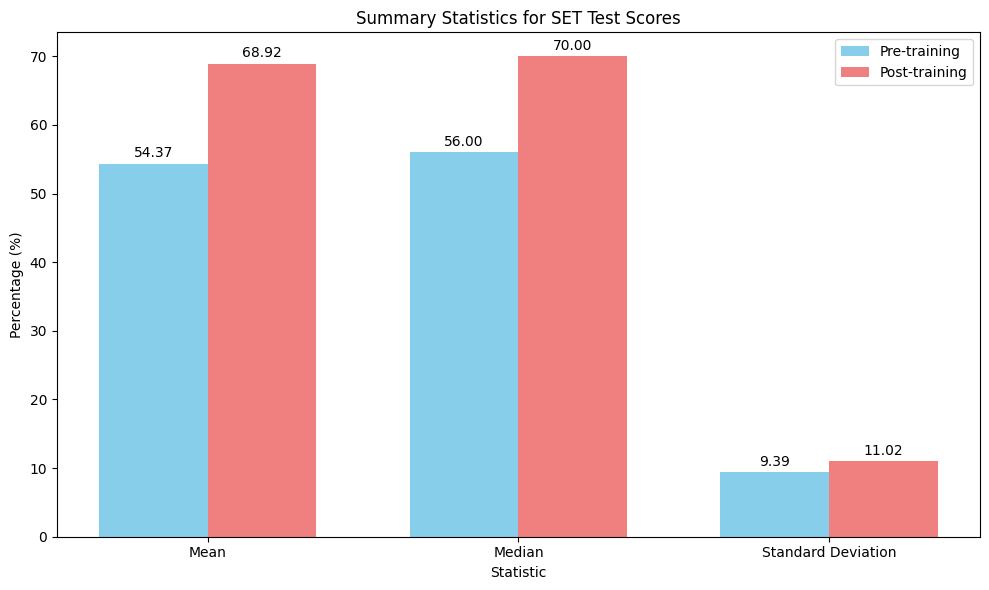

In [19]:
# Load datasets
pre_df = pd.read_csv("./datasets/Data SET primary cohort II - Cleaned data pre-test  SET.csv", skiprows=1)
post_df = pd.read_csv("./datasets/Data SET primary cohort II - Cleaned Raw data SET post-test.csv", skiprows=1)

# Drop NaN values in percentage columns
pre_df["Percentage"] = pd.to_numeric(pre_df["Total/100"], errors="coerce")
post_df["Percentage"] = pd.to_numeric(post_df["Percentage"], errors="coerce")
pre_df = pre_df.dropna(subset=["Percentage"])
post_df = post_df.dropna(subset=["Percentage"])

print("Pre-training Rows after dropping NaN:", len(pre_df))
print("Post-training Rows after dropping NaN:", len(post_df))

# Check unique values in categorical columns
print("\nUnique values in Post-training Dataset:")
for col in ["Your Gender", "Your Highest level of education", "Are you a subject leader at your school?", "Number of students in your classes"]:
    print(f"{col}:", post_df[col].unique())

print("\nUnique values in Pre-training Dataset:")
for col in ["Your Gender", "Your Highest level of education", "Are you a subject leader at your school?", "Number of students in your classes"]:
    print(f"{col}:", pre_df[col].unique())

# Visualize the summary statistics
stats = {
    'Mean': [pre_df['Percentage'].mean(), post_df['Percentage'].mean()],
    'Median': [pre_df['Percentage'].median(), post_df['Percentage'].median()],
    'Standard Deviation': [pre_df['Percentage'].std(), post_df['Percentage'].std()]
}
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(stats))
width = 0.35
ax.bar(x - width/2, [stats[key][0] for key in stats], width, label='Pre-training', color='skyblue')
ax.bar(x + width/2, [stats[key][1] for key in stats], width, label='Post-training', color='lightcoral')
ax.set_xlabel('Statistic')
ax.set_ylabel('Percentage (%)')
ax.set_title('Summary Statistics for SET Test Scores')
ax.set_xticks(x)
ax.set_xticklabels(stats.keys())
ax.legend()
for i, key in enumerate(stats):
    ax.text(i - width/2, stats[key][0] + 0.5, f'{stats[key][0]:.2f}', ha='center', va='bottom')
    ax.text(i + width/2, stats[key][1] + 0.5, f'{stats[key][1]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Step 3: Feature Engineering and Pre-processing datasets

Identifying desired dataset features and processing the datasets. This also involves converting features to numeric. 

In [20]:
features = [
    "Age",
    "Your Gender",
    "Your Highest level of education",
    "Years of teaching experience (please write 0 if you don't have any teaching experience)",
    "Number of students in your classes",
    "How many periods of classes (all subjects) do you teach in a typical week?",
    "Are you a subject leader at your school?"
]
target = "Percentage"

# Preprocess post-training dataset
post_df = post_df[features + [target]].copy()
post_df = post_df.dropna()
post_df["Your Gender"] = post_df["Your Gender"].replace({"Male": 0, "Female": 1}).infer_objects(copy=False)
post_df["Your Highest level of education"] = post_df["Your Highest level of education"].replace({"A1": 1, "A2": 0, "A0": 0}).infer_objects(copy=False)
post_df["Are you a subject leader at your school?"] = post_df["Are you a subject leader at your school?"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)

def convert_student_count(range_str):
    if not isinstance(range_str, str):
        return 45
    range_str = range_str.replace(" ", "").replace("–", "-")
    if range_str == "<30":
        return 25
    elif range_str == "30-40":
        return 35
    elif range_str == "40-50":
        return 45
    elif range_str == "50-60":
        return 55
    elif range_str == ">60":
        return 65
    else:
        return 45

post_df["Number of students in your classes"] = post_df["Number of students in your classes"].apply(convert_student_count)
post_df = post_df.dropna()

# Split features and target variable
X = post_df[features]
y = post_df[target]

In [21]:
print("\nFirst 10 features")
X.head(10)


First 10 features


,Age,Your Gender,Your Highest level of education,Years of teaching experience (please write 0 if you don't have any teaching experience),Number of students in your classes,How many periods of classes (all subjects) do you teach in a typical week?,Are you a subject leader at your school?
0,26.0,1,1,4.0,65,46.0,0
1,34.0,0,0,11.0,45,40.0,1
2,34.0,1,0,12.0,45,38.0,0
3,35.0,0,0,12.0,45,38.0,0
4,21.0,1,0,2.0,45,38.0,1
5,25.0,1,0,0.0,55,38.0,0
6,30.0,1,0,6.0,55,44.0,1
7,40.0,0,0,16.0,45,32.0,0
8,33.0,1,0,12.0,45,42.0,1
9,32.0,0,0,7.0,35,40.0,1


In [22]:
print("\nFirst 10 targets\n")
y.head(10)


First 10 targets



0    82.0
1    70.0
2    40.0
3    76.0
4    78.0
5    60.0
6    54.0
7    80.0
8    60.0
9    82.0
Name: Percentage, dtype: float64

#### Step 4: Data Visualization

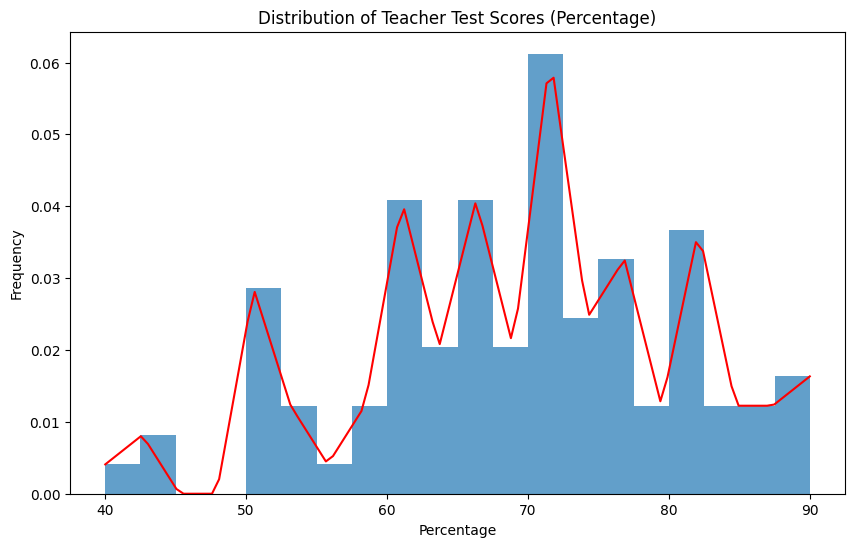

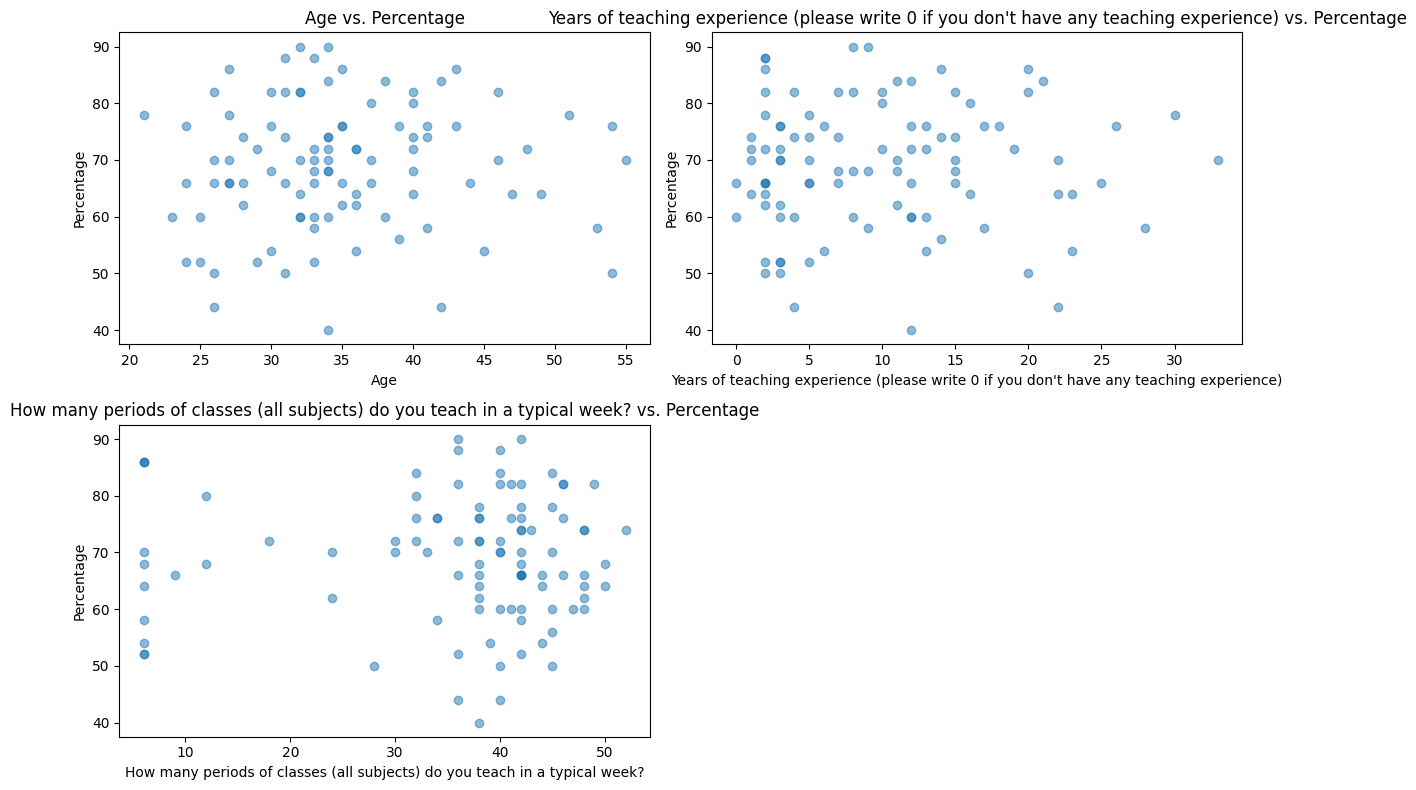

In [23]:
# Visualizing distribution of the target variable (Percentage)
plt.figure(figsize=(10, 6))
plt.hist(post_df["Percentage"], bins=20, density=True, alpha=0.7)
plt.title("Distribution of Teacher Test Scores (Percentage)")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
kde_x = np.linspace(post_df["Percentage"].min(), post_df["Percentage"].max(), 100)
kde_y = np.histogram(post_df["Percentage"], bins=20, density=True)[0]
plt.plot(kde_x, np.interp(kde_x, np.linspace(post_df["Percentage"].min(), post_df["Percentage"].max(), 20), kde_y), 'r-')
plt.show()

# Visualizing correlation between numerical features and Percentage
numerical_features = ["Age", "Years of teaching experience (please write 0 if you don't have any teaching experience)", "How many periods of classes (all subjects) do you teach in a typical week?"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(post_df[feature], post_df["Percentage"], alpha=0.5)
    plt.title(f"{feature} vs. Percentage")
    plt.xlabel(feature)
    plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

#### Step 5: Standardize data, split data and train LinearRegression model

In [24]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 6: LinearRegression model loss curve using MSE and scatter plot

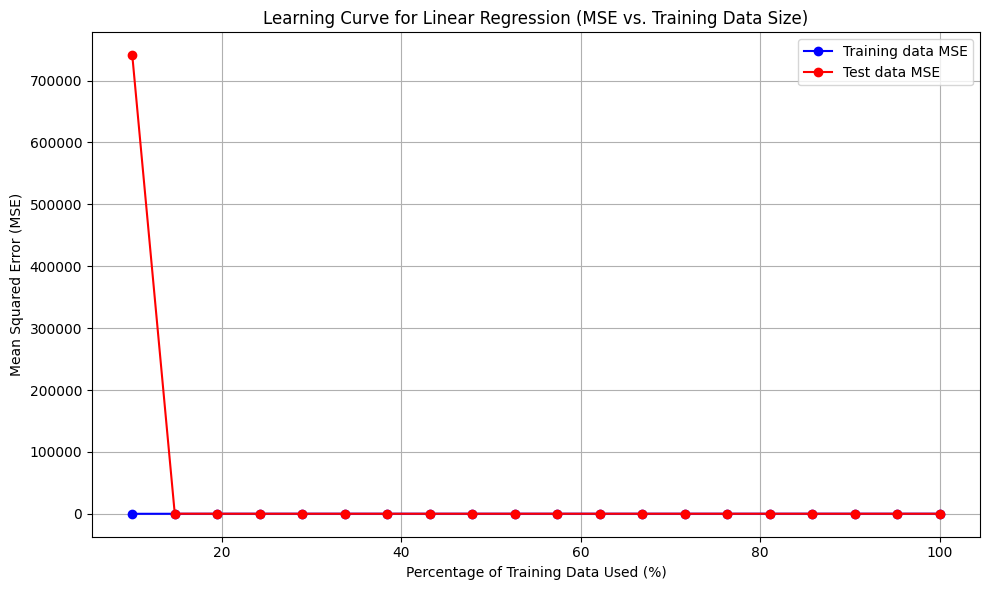

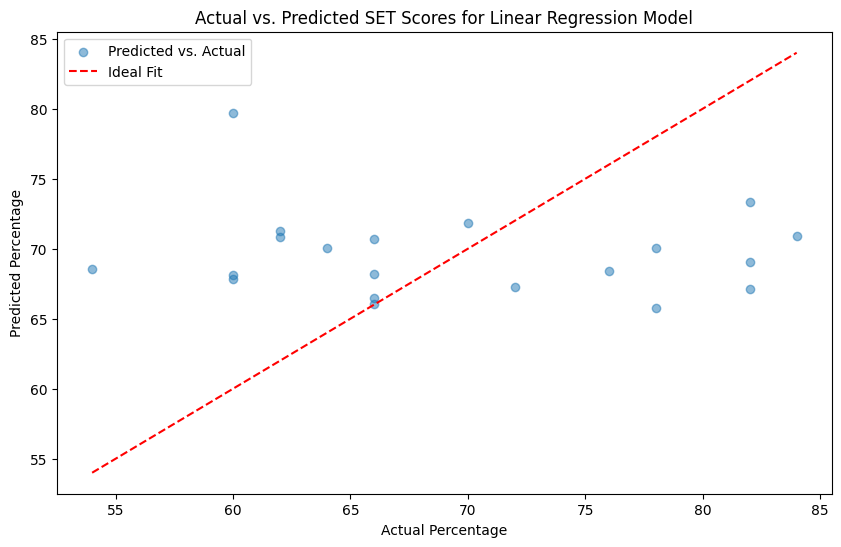

In [25]:
# Initialize lists to store MSE values
train_mse = []
test_mse = []
train_sizes = np.linspace(0.1, 1.0, 20)  # Vary training data size from 10% to 100%

# Train model on increasing subsets of training data
for train_size in train_sizes:
    # Get subset of training data
    n_samples = int(len(X_train) * train_size)
    X_train_subset = X_train[:n_samples]
    y_train_subset = y_train[:n_samples]
    
    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_subset, y_train_subset)
    
    # Predict and calculate MSE for training and test sets
    y_train_pred = lr_model.predict(X_train_subset)
    y_test_pred = lr_model.predict(X_test)
    
    train_mse.append(mean_squared_error(y_train_subset, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot the MSE loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_mse, label='Training data MSE', color='blue', marker='o')
plt.plot(train_sizes * 100, test_mse, label='Test data MSE', color='red', marker='o')
plt.xlabel('Percentage of Training Data Used (%)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curve for Linear Regression (MSE vs. Training Data Size)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize actual vs. predicted scores of the best model
plt.figure(figsize=(10, 6))
y_pred_test = lr_model.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Predicted vs. Actual", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Ideal Fit")
plt.title(f"Actual vs. Predicted SET Scores for Linear Regression Model")
plt.xlabel("Actual Percentage")
plt.ylabel("Predicted Percentage")
plt.legend()
plt.show()

#### Step 7: Compare, visualize models and save the best model

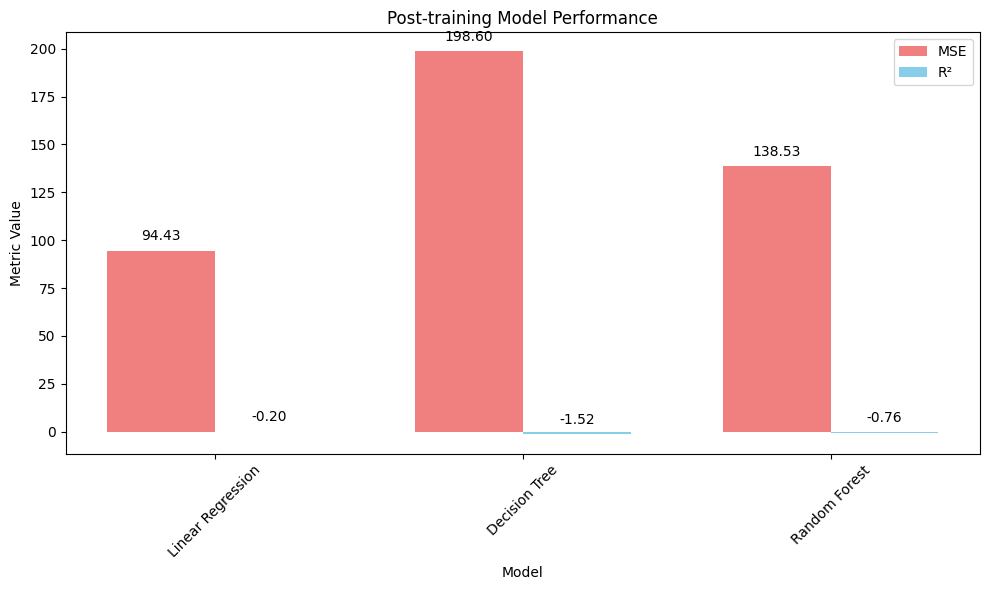

In [26]:
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Evaluate models
models = {"Linear Regression": lr_model, "Decision Tree": dt_model, "Random Forest": rf_model}
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Visualize models performance using MSE and R2
mse_values = [results[model]['MSE'] for model in list(results.keys())]
r2_values = [results[model]['R2'] for model in list(results.keys())]
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(list(results.keys())))
width = 0.35
ax.bar(x - width/2, mse_values, width, label='MSE', color='lightcoral')
ax.bar(x + width/2, r2_values, width, label='R²', color='skyblue')
ax.set_xlabel('Model')
ax.set_ylabel('Metric Value')
ax.set_title('Post-training Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(list(results.keys()), rotation=45)
ax.legend()
for i, mse in enumerate(mse_values):
    ax.text(i - width/2, mse + 0.02 * max(mse_values), f'{mse:.2f}', ha='center', va='bottom')
for i, r2 in enumerate(r2_values):
    ax.text(i + width/2, r2 + 0.02 * max(mse_values), f'{r2:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Save best model
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = models[best_model_name]
pickle.dump(best_model, open("best_model_post_training.pkl", "wb"))
pickle.dump(scaler, open("scaler_post_training.pkl", "wb"))

#### Step 8: Example prediction with saved model and scaler

In [ ]:
import pickle
import pandas as pd

# Load the model and scaler from files
def load_model_and_scaler(model_path: str, scaler_path: str):
    try:
        with open(model_path, 'rb') as model_file:
            model = pickle.load(model_file)
        with open(scaler_path, 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)
        print(f"Model loaded from {model_path} and scaler loaded from {scaler_path}")
        return model, scaler
    except Exception as e:
        print(f"Error loading model or scaler: {e}")
        raise

# Prediction function
def predict_teacher_performance(input_data, model, scaler):
    input_df = pd.DataFrame([input_data], columns=features)
    gender_map = {"Male": 0, "Female": 1}
    education_map = {"A1": 1, "A2": 0, "A0": 0}
    subject_leader_map = {"Yes": 1, "No": 0}

    input_df["Your Gender"] = input_df["Your Gender"].map(gender_map)
    if input_df["Your Gender"].isna().any():
        raise ValueError("Invalid value for 'Your Gender'. Expected 'Male' or 'Female'.")

    input_df["Your Highest level of education"] = input_df["Your Highest level of education"].map(education_map)
    if input_df["Your Highest level of education"].isna().any():
        raise ValueError("Invalid value for 'Your Highest level of education'. Expected 'A1', 'A2', or 'A0'.")

    input_df["Are you a subject leader at your school?"] = input_df["Are you a subject leader at your school?"].map(subject_leader_map)
    if input_df["Are you a subject leader at your school?"].isna().any():
        raise ValueError("Invalid value for 'Are you a subject leader at your school?'. Expected 'Yes' or 'No'.")

    input_df["Number of students in your classes"] = input_df["Number of students in your classes"].apply(convert_student_count)

    if input_df.isna().any().any():
        raise ValueError(f"Input contains NaN values after preprocessing: {input_df}")
    
    # Load the model and scaler using the new function
    saved_model, saved_scaler = load_model_and_scaler(
        model_path='best_model_post_training.pkl',
        scaler_path='scaler_post_training.pkl'
    )

    input_scaled = saved_scaler.transform(input_df)
    prediction = saved_model.predict(input_scaled)
    return prediction[0]

example_input = {
    "Age": 30,
    "Your Gender": "Female",
    "Your Highest level of education": "A2",
    "Years of teaching experience (please write 0 if you don't have any teaching experience)": 5,
    "Number of students in your classes": "40-50",
    "How many periods of classes (all subjects) do you teach in a typical week?": 40,
    "Are you a subject leader at your school?": "Yes"
}

try:
    prediction = predict_teacher_performance(example_input, best_model, scaler)
    print(f"\nPredicted Post-training SET Score: {prediction:.2f}%")
except ValueError as e:
    print(f"Prediction Error: {e}")

Model loaded from best_model_post_training.pkl and scaler loaded from scaler_post_training.pkl

Predicted Post-training SET Score: 68.81%
